In [16]:
X_train_max

,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
3869,33.5,70.915665,99.929085,28.492829,10.370951,54.106961,0.313095,0.333859,0.171526,0.068894,0.013266,0.017980,0.007320,0.000000,37.6181,127.004,146.5540,4.7296,5525.581543
6761,31.4,73.748924,87.632233,29.667424,7.884646,12.634900,0.494535,0.508718,0.419303,0.348815,0.000000,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5667.030273
5512,34.1,42.451828,83.155701,35.287364,4.853302,41.008393,0.329650,0.065887,0.106380,0.048282,0.005121,0.000000,0.000000,0.000000,37.5776,127.083,59.8324,2.6865,5310.041992
7470,28.0,77.485001,91.248398,27.022883,7.300631,56.389514,0.806596,0.789278,0.899705,0.741062,0.260805,0.757429,3.253544,0.154866,37.5507,127.040,26.2980,0.5721,4865.184082
6235,29.4,83.249763,93.612686,26.641043,8.103840,63.706832,0.889049,0.850386,0.842222,0.877718,5.304721,0.250221,0.065307,3.920311,37.5372,127.085,28.7000,0.6233,5858.687012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,31.2,57.780563,91.607697,26.765223,4.540439,45.774381,0.439386,0.830278,0.742903,0.619832,0.007283,2.224940,0.935079,0.009690,37.5237,126.909,17.2956,0.2223,4950.971680
583,25.9,70.273911,95.954834,26.845498,12.947474,98.011663,0.645223,0.447715,0.072493,0.216757,1.096827,0.143181,0.000000,0.000000,37.4967,126.826,50.9312,0.4125,5604.399414
5964,35.5,41.944313,70.198875,34.505723,6.381540,24.780681,0.000314,0.014590,0.051933,0.042325,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,4772.682617
2480,26.9,47.077930,95.008842,29.510238,4.997554,54.472962,0.785864,0.594523,0.259602,0.296701,0.042974,0.256186,0.000000,0.049174,37.5102,127.042,54.6384,0.1457,5275.238281


In [15]:
y_train_max

3869    33.1
6761    27.2
5512    36.1
7470    26.0
6235    27.9
        ... 
2748    26.0
583     28.5
5964    35.5
2480    27.8
7335    24.6
Name: Next_Tmax, Length: 6449, dtype: float64

D:\University\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


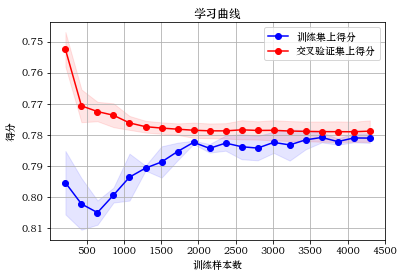

(0.7789729480981421, 0.007233834698881392)

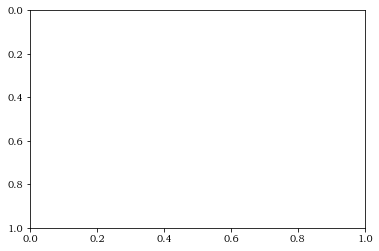

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

LR = LinearRegression()


plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(LR, u"学习曲线", X_train_max,y_train_max)

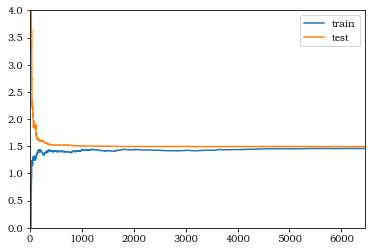

In [22]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    """绘制学习曲线：只需要传入算法(或实例对象)、X_train、X_test、y_train、y_test"""
    """当使用该函数时传入算法，该算法的变量要进行实例化，如：PolynomialRegression(degree=2)，变量 degree 要进行实例化"""
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(test_score), label="test")
    
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
plot_learning_curve(LR,X_train_max,X_test_max,y_train_max,y_test_max)

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/Desktop/Bias_correction_ucl.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [2]:
#缺失值检测函数
def null_value_check(data):
    '''输入：pandas数组'''
    '''输出：每一列的缺失值情况'''
    for i in data.columns:
        print(i,'列缺失值个数为：',data[i].isnull().sum())
null_value_check(data)

station 列缺失值个数为： 2
Date 列缺失值个数为： 2
Present_Tmax 列缺失值个数为： 70
Present_Tmin 列缺失值个数为： 70
LDAPS_RHmin 列缺失值个数为： 75
LDAPS_RHmax 列缺失值个数为： 75
LDAPS_Tmax_lapse 列缺失值个数为： 75
LDAPS_Tmin_lapse 列缺失值个数为： 75
LDAPS_WS 列缺失值个数为： 75
LDAPS_LH 列缺失值个数为： 75
LDAPS_CC1 列缺失值个数为： 75
LDAPS_CC2 列缺失值个数为： 75
LDAPS_CC3 列缺失值个数为： 75
LDAPS_CC4 列缺失值个数为： 75
LDAPS_PPT1 列缺失值个数为： 75
LDAPS_PPT2 列缺失值个数为： 75
LDAPS_PPT3 列缺失值个数为： 75
LDAPS_PPT4 列缺失值个数为： 75
lat 列缺失值个数为： 0
lon 列缺失值个数为： 0
DEM 列缺失值个数为： 0
Slope 列缺失值个数为： 0
Solar radiation 列缺失值个数为： 0
Next_Tmax 列缺失值个数为： 27
Next_Tmin 列缺失值个数为： 27


In [3]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [4]:
data1 = data.drop(['station', 'Date'], axis=1) 

In [5]:
import math
#R方的计算
def R2(X, Y):
    r2=1-((1/len(X)) * np.sum((X - Y)**2))/np.var(X)
    return r2

In [6]:
def RMSE(y, t):
    return ((1/len(y)) * np.sum((y - t)**2))**0.5

In [7]:
newdata = data1.copy()

'''拆分预测：最高温和最低温'''
new_data1 = newdata.iloc[:,0:21]
data1_Tmax_X = new_data1.drop(['LDAPS_Tmin_lapse','Present_Tmin'], axis=1) 
data1_Tmin_X = new_data1.drop(['LDAPS_Tmax_lapse','Present_Tmax'], axis=1) 

data1_Tmax_target = newdata['Next_Tmax']
data1_Tmin_target = newdata['Next_Tmin']

'''拆分数据集为训练集和测试集（85%训练集+15%测试集）'''
from sklearn.model_selection import train_test_split
X_train_max,X_test_max,y_train_max,y_test_max = train_test_split(data1_Tmax_X,data1_Tmax_target,test_size=0.15,random_state=33)
X_train_min,X_test_min,y_train_min,y_test_min = train_test_split(data1_Tmin_X,data1_Tmin_target,test_size=0.15,random_state=44)

In [9]:
X_train_max.iloc[:1000]

,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
3869,33.5,70.915665,99.929085,28.492829,10.370951,54.106961,0.313095,0.333859,0.171526,0.068894,0.013266,0.017980,0.007320,0.000000,37.6181,127.004,146.5540,4.7296,5525.581543
6761,31.4,73.748924,87.632233,29.667424,7.884646,12.634900,0.494535,0.508718,0.419303,0.348815,0.000000,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5667.030273
5512,34.1,42.451828,83.155701,35.287364,4.853302,41.008393,0.329650,0.065887,0.106380,0.048282,0.005121,0.000000,0.000000,0.000000,37.5776,127.083,59.8324,2.6865,5310.041992
7470,28.0,77.485001,91.248398,27.022883,7.300631,56.389514,0.806596,0.789278,0.899705,0.741062,0.260805,0.757429,3.253544,0.154866,37.5507,127.040,26.2980,0.5721,4865.184082
6235,29.4,83.249763,93.612686,26.641043,8.103840,63.706832,0.889049,0.850386,0.842222,0.877718,5.304721,0.250221,0.065307,3.920311,37.5372,127.085,28.7000,0.6233,5858.687012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,33.5,59.930386,90.314140,26.701993,16.392453,165.800953,0.606364,0.401727,0.154654,0.002543,0.237766,0.246287,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5546.319336
1173,32.2,50.719559,88.476639,32.726109,6.983965,47.842128,0.427556,0.408515,0.096398,0.060446,0.010893,0.045286,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,4983.820801
7414,28.1,57.669006,88.839165,29.149620,5.202470,20.369862,0.248113,0.487560,0.495203,0.102410,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,4945.837402
2137,25.9,37.562962,95.039513,30.908479,4.060611,46.911443,0.788231,0.607300,0.076899,0.458855,1.207631,0.530486,0.119606,0.000549,37.5776,127.083,59.8324,2.6865,5582.858887


In [10]:
y_train_max[0:1000]

3869    33.1
6761    27.2
5512    36.1
7470    26.0
6235    27.9
        ... 
2179    26.7
1173    32.7
7414    30.0
2137    24.7
3964    31.3
Name: Next_Tmax, Length: 1000, dtype: float64

## 3.决策树

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

'''
回归树：
    严格上说 回归树不能算是回归
    叶子节点是一团训练数据的均值 不是连续 具体的预测值

    解决特征非线性的问题
    不要求特征标准化和统一量化

    容易过于复杂丧失泛化能力
    稳定性较差，细微改变会导致树结构发生重大变化

'''

# 使用回归树进行训练和预测
# 初始化k近邻回归模型 使用平均回归进行预测
dtr1 = DecisionTreeRegressor()
dtr2 = DecisionTreeRegressor()
# 训练
dtr1.fit(X_train_max, y_train_max)
dtr2.fit(X_train_min, y_train_min)
# 预测 保存预测结果
dtr1_y_predict = dtr1.predict(X_test_max)
dtr2_y_predict = dtr2.predict(X_test_min)

# 模型评估
print("------------------最高温----------------------------------")
print("回归树的默认评估值为：", dtr1.score(X_test_max, y_test_max))
print("平回归树的R_squared值为：", R2(y_test_max, dtr1_y_predict))
print("回归树的均方误差为:", RMSE(y_test_max, dtr1_y_predict))

print("------------------最低温----------------------------------")
print("回归树的默认评估值为：", dtr2.score(X_test_min, y_test_min))
print("平回归树的R_squared值为：", R2(y_test_min, dtr2_y_predict))
print("回归树的均方误差为:", RMSE(y_test_min, dtr2_y_predict))

------------------最高温----------------------------------
回归树的默认评估值为： 0.7934369137433027
平回归树的R_squared值为： 0.7934369137433033
回归树的均方误差为: 1.407988621352378
------------------最低温----------------------------------
回归树的默认评估值为： 0.7873981953499415
平回归树的R_squared值为： 0.7873981953499419
回归树的均方误差为: 1.1438195182939492


In [29]:
#对LDAPS模型的偏差校正做出贡献大小
#输出值为正数：有贡献，数值越大贡献越大。负值无贡献。
#输入：偏差校正模型计算得到的MSE，为array数组形式（最高温，最低温）
def LDAPS_correction(rmse):
    LDAPS_RMSE = np.array([1.8502362971862867, 1.3039642827582851])
    return sum((LDAPS_RMSE-rmse)/LDAPS_RMSE),(LDAPS_RMSE-rmse)/LDAPS_RMSE

In [30]:
DTR_rmse = np.array([1.407988621352378,1.1438195182939492])
LDAPS_correction(DTR_rmse)

(0.361836033991757, array([0.23902227, 0.12281377]))

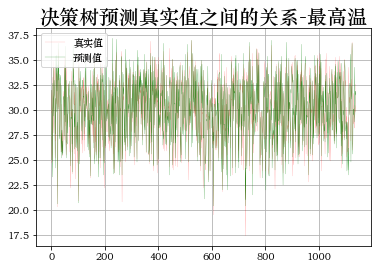

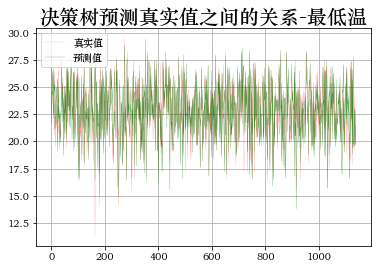

In [16]:
'''预测值和真实值的比较'''
plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

t=np.arange(len(X_test_max))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_max, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, dtr1_y_predict, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("决策树预测真实值之间的关系-最高温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()


t=np.arange(len(X_test_min))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_min, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, dtr2_y_predict, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("决策树预测真实值之间的关系-最低温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

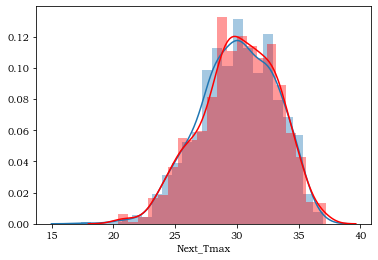

In [18]:
import seaborn as sns
sns.distplot(y_test_max)
sns.distplot(dtr1_y_predict, color="red")

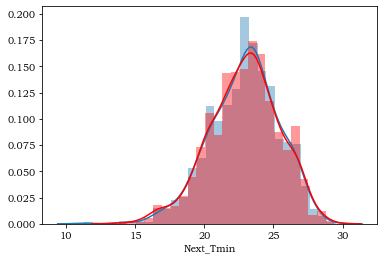

In [19]:
sns.distplot(y_test_min)
sns.distplot(dtr2_y_predict, color="red")

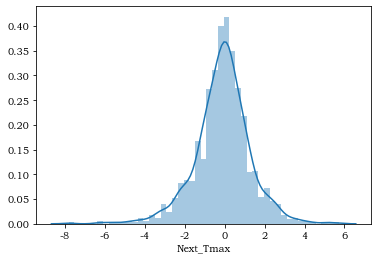

In [20]:
sns.distplot(y_test_max-dtr1_y_predict)

## 3.KNR

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# 4 两种k近邻回归行学习和预测
# 初始化k近邻回归模型 使用平均回归进行预测
uni_knr1 = KNeighborsRegressor(weights="distance")
uni_knr2 = KNeighborsRegressor(weights="distance")
# 训练
uni_knr1.fit(X_train_max, y_train_max)
uni_knr2.fit(X_train_min, y_train_min)
# 预测 保存预测结果
uni_knr1_y_predict = uni_knr1.predict(X_test_max)
uni_knr2_y_predict = uni_knr1.predict(X_test_min)

#  模型评估
# 平均k近邻回归 模型评估

print("------------------最高温----------------------------------")
print("平均k近邻回归的默认评估值为：", uni_knr1.score(X_test_max, y_test_max))
print("平均k近邻回归的R_squared值为：", r2_score(y_test_max, uni_knr1_y_predict))
print("平均k近邻回归的均方误差为:", RMSE(y_test_max, uni_knr1_y_predict))

print("------------------最低温----------------------------------")

print("平均k近邻回归的默认评估值为：", uni_knr2.score(X_test_min, y_test_min))
print("平均k近邻回归的R_squared值为：", r2_score(y_test_min, uni_knr2_y_predict))
print("平均k近邻回归的均方误差为:", RMSE(y_test_min, uni_knr2_y_predict))

------------------最高温----------------------------------
平均k近邻回归的默认评估值为： 0.5427696294954089
平均k近邻回归的R_squared值为： 0.5427696294954089
平均k近邻回归的均方误差为: 2.094789184994137
------------------最低温----------------------------------
平均k近邻回归的默认评估值为： 0.48591551290270757
平均k近邻回归的R_squared值为： -8.00705304741403
平均k近邻回归的均方误差为: 7.44501179396049


## 4.bagging

In [49]:
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor1 = BaggingRegressor()
model_BaggingRegressor1.fit(X_train_max, y_train_max)
model_BaggingRegressor2 = BaggingRegressor()
model_BaggingRegressor2.fit(X_train_min, y_train_min)
model_BaggingRegressor1.score(X_test_max, y_test_max),model_BaggingRegressor2.score(X_test_min, y_test_min)

(0.881612636391019, 0.8850191722468019)

In [51]:
y_predict_max = model_BaggingRegressor1.predict(X_test_max)
y_predict_min = model_BaggingRegressor2.predict(X_test_min)

print("------------------最高温----------------------------------")
print("bagging的R_squared值为：", R2(y_test_max, y_predict_max))
print("bagging的均方误差为:", RMSE(y_test_max, y_predict_max))

print("------------------最低温----------------------------------")
print("bagging的R_squared值为：", R2(y_test_min, y_predict_min))
print("bagging的均方误差为:", RMSE(y_test_min, y_predict_min))

------------------最高温----------------------------------
bagging的R_squared值为： 0.8816126363910193
bagging的均方误差为: 1.0659220906914615
------------------最低温----------------------------------
bagging的R_squared值为： 0.8850191722468022
bagging的均方误差为: 0.8411757522544622


In [52]:
bg_rmse = np.array([1.0659220906914615,0.8411757522544622])
LDAPS_correction(bg_rmse)

0.7788083821854498

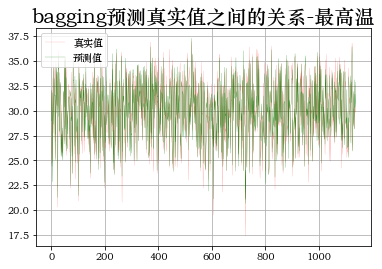

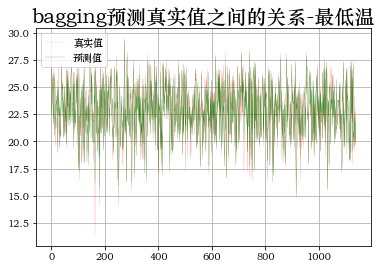

In [53]:
'''预测值和真实值的比较'''
plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

t=np.arange(len(X_test_max))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_max, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, y_predict_max, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("bagging预测真实值之间的关系-最高温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()


t=np.arange(len(X_test_min))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_min, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, y_predict_min, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("bagging预测真实值之间的关系-最低温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

## 5.GBRT(gradient boosting regression tree)

In [21]:
from sklearn import ensemble
model_GradientBoostingRegressor1 = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
model_GradientBoostingRegressor2 = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树

model_GradientBoostingRegressor1.fit(X_train_max, y_train_max)
model_GradientBoostingRegressor2.fit(X_train_min, y_train_min)

gbr_y_predict_max = model_GradientBoostingRegressor1.predict(X_test_max)
gbr_y_predict_min = model_GradientBoostingRegressor2.predict(X_test_min)

print(R2(y_test_max, gbr_y_predict_max),RMSE(y_test_max, gbr_y_predict_max))
print(R2(y_test_min, gbr_y_predict_min),RMSE(y_test_min, gbr_y_predict_min))

0.8405458534512428 1.2370598079072286
0.8748984134911427 0.8774157753703741


In [22]:
model_GradientBoostingRegressor1.score(X_test_max, y_test_max),model_GradientBoostingRegressor2.score(X_test_min, y_test_min)

(0.8405458534512424, 0.8748984134911424)

In [31]:
gbr_rmse = np.array([1.2378248162517966,0.8771667382820475])
LDAPS_correction(gbr_rmse)

(0.6582986516110713, array([0.33099096, 0.3273077 ]))

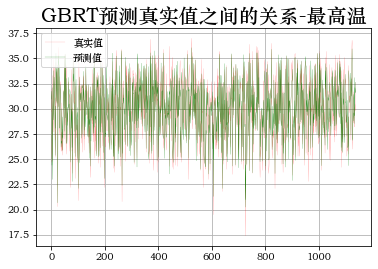

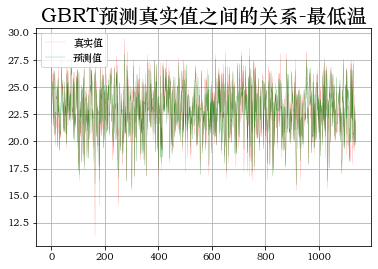

In [24]:
'''预测值和真实值的比较'''
plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

t=np.arange(len(X_test_max))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_max, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, gbr_y_predict_max, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("GBRT预测真实值之间的关系-最高温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()


t=np.arange(len(X_test_min))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_min, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, gbr_y_predict_min, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("GBRT预测真实值之间的关系-最低温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

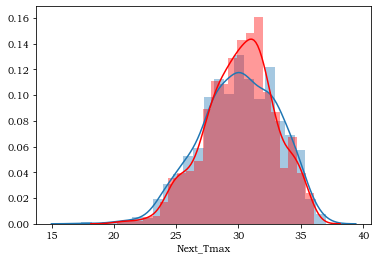

In [25]:
import seaborn as sns
sns.distplot(y_test_max)
sns.distplot(gbr_y_predict_max, color="red")

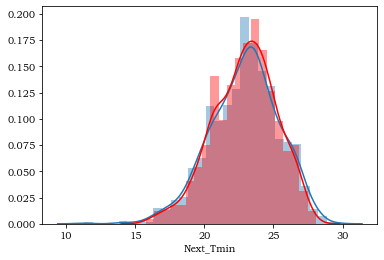

In [26]:
sns.distplot(y_test_min)
sns.distplot(gbr_y_predict_min, color="red")

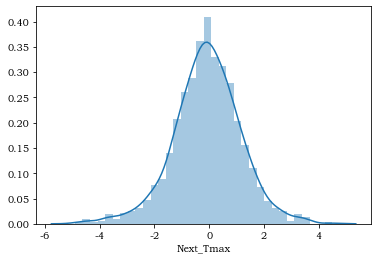

In [27]:
sns.distplot(y_test_max-gbr_y_predict_max) 

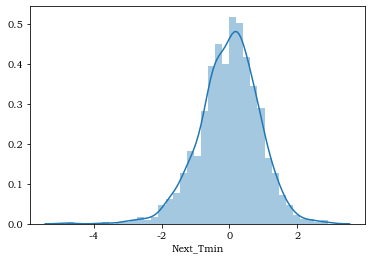

In [28]:
sns.distplot(y_test_min-gbr_y_predict_min) 

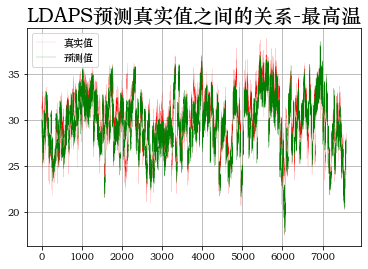

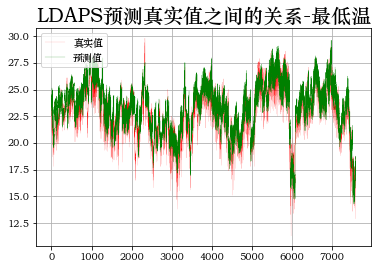

In [65]:
'''预测值和真实值的比较'''

plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

t=np.arange(len(data1['Next_Tmax']))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, np.array(data1['Next_Tmax']), 'r-', linewidth=0.1, label='真实值')
plt.plot(t, np.array(data1['LDAPS_Tmax_lapse']), 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("LDAPS预测真实值之间的关系-最高温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

t=np.arange(len(data1['Next_Tmax']))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, np.array(data1['Next_Tmin']), 'r-', linewidth=0.1, label='真实值')
plt.plot(t, np.array(data1['LDAPS_Tmin_lapse']), 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("LDAPS预测真实值之间的关系-最低温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

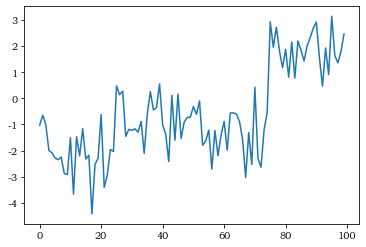

In [70]:
a = data1['LDAPS_Tmax_lapse']-data1['Next_Tmax']
t=np.arange(100)
plt.plot(t,a.iloc[0:100],label='second line')

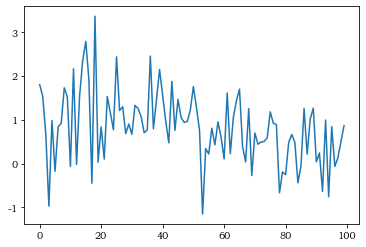

In [81]:
a = data1['LDAPS_Tmin_lapse']-data1['Next_Tmin']
t=np.arange(100)
plt.plot(t,a.iloc[0:100],label='second line')

In [67]:
a

0      -1.025899
1      -0.649311
2      -1.008708
3      -1.995371
4      -2.086066
          ...   
7745    0.212697
7746   -1.295095
7747   -1.947919
7748   -1.589807
7749    0.139516
Length: 7588, dtype: float64

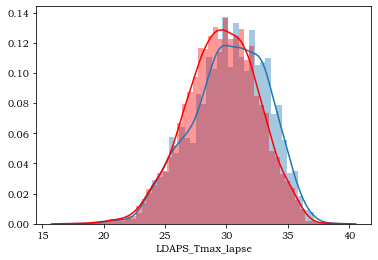

In [79]:
sns.distplot(data1['Next_Tmax'])
sns.distplot(data1['LDAPS_Tmax_lapse'], color="red")

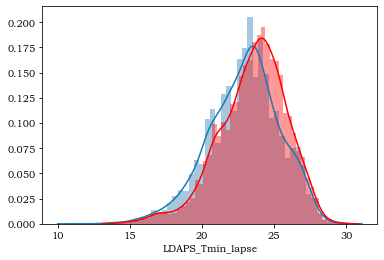

In [80]:
sns.distplot(data1['Next_Tmin'])
sns.distplot(data1['LDAPS_Tmin_lapse'], color="red")

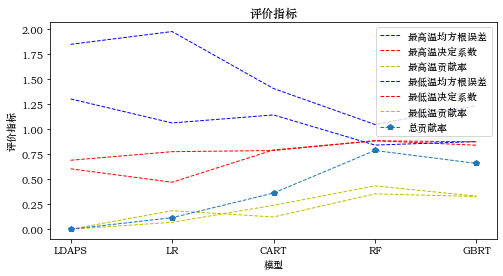

In [56]:
x = ['LDAPS','LR','CART','RF','GBRT']
y1 = [1.85024,1.9782,1.4079,1.0479,1.237]
y2 = [0.604829,0.470,0.7934,0.8856,0.8405]
y3 = [0,0.069,0.239,0.434,0.331]
y4 = [1.30396,1.0633,1.1438,0.8419,0.877]
y5 = [0.6901,0.776,0.7873,0.8848,0.875]
y6 = [0,0.185,0.1228,0.354,0.327]
y7 = [0,0.1155,0.3618,0.788,0.6583]

plt.figure(figsize=(8,4)) #创建绘图对象
plt.plot(x,y1,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.plot(x,y2,"r--",linewidth=1)
plt.plot(x,y3,"y--",linewidth=1)

plt.plot(x,y4,"b--",linewidth=1)
plt.plot(x,y5,"r--",linewidth=1)
plt.plot(x,y6,"y--",linewidth=1)
         
plt.plot(x,y7,"p--",linewidth=1)
         
plt.xlabel("模型") #X轴标签
plt.ylabel("评价指标")  #Y轴标签
plt.title("评价指标") #图标题
plt.legend(['最高温均方根误差','最高温决定系数','最高温贡献率','最低温均方根误差','最低温决定系数','最低温贡献率','总贡献率'])
plt.show()  #显示图
